# Ejercicios 5 (Proyecto Final)

## Entrega Domingo 9 de Diciembre

#### 1. Pesos en la función de correlación (estimador de Landy-Salay)

   __a)__ Construye dos anillos concéntricos de radios distintos y ancho fijo, pero que el radio mayor del anillo más pequeño sea igual al radio menor del anillo más grande (ie ambos anillos deben de verse como un solo anillo del doble de ancho). La densidad de ambos anillos debe de ser igual. Grafica la distribución poniendo color rojo a los puntos del anillo pequeño y azul a los del grande.

Para que la densidad sea la misma en dos anillos del mismo grosor, la relación entre el número de puntos de cada anillo debe ser:

$$
n_{ch} = n_g\frac{r_{co}^2 - r_i^2}{r_e^2 - r_{co}^2}
$$

donde $n_{ch}$ es el número de puntos del anillo chico, $n_g$ del grande, $r_{co}$ el radio que tienen los anillos en común, $r_e$ el radio exterior del anillo grande y $r_i$ el radio interior del anillo chico.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import distros

In [2]:
n_g = 1000
r_i = 200.0
r_e = 300.0
r_co = (r_e + r_i) / 2.0
n_ch = int(n_g * (r_co**2 - r_i**2) / (r_e**2 - r_co**2))
box_size = 1000.0
bin_size = 5.0

In [3]:
x_peq, y_peq = distros.anillo_dist(n_ch, r_i, r_co, box_size / 2.0, box_size / 2.0)
x_gde, y_gde = distros.anillo_dist(n_g, r_co, r_e, box_size / 2.0, box_size / 2.0)

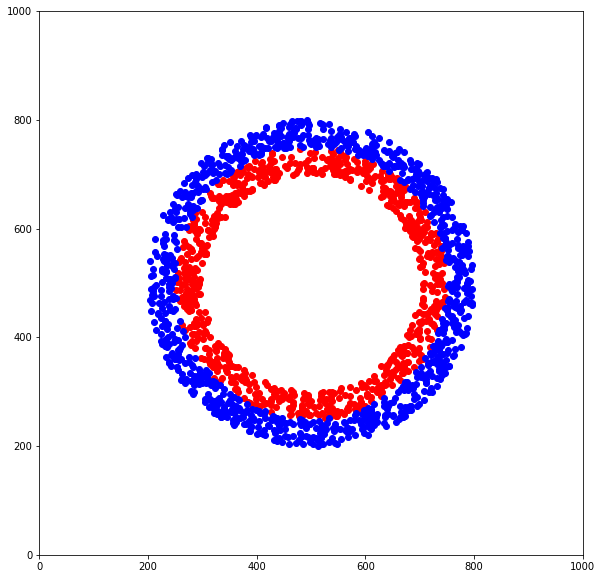

In [4]:
plt.figure(figsize = (10, 10))
plt.xlim([0.0, box_size])
plt.ylim([0.0, box_size])
plt.plot(x_peq, y_peq, 'ro')
plt.plot(x_gde, y_gde, 'bo')
plt.gca().set_aspect('equal')

   __b)__ Mide la función de correlación asignando los siguientes pesos a cada punto: para puntos en el anillo pequeño (rojos) usa un peso de 2, mientras que para puntos en el anillo grande (azules) usa 1/2. Sobrepon en una gráfica la función de correlación sin pesos con la de pesos, y describe las diferencias en palabras.

In [5]:
bin_size = 5.0

In [6]:
dist_gde, hist_gde = distros.save_hist(x_gde, y_gde, box_size, bin_size)
frec_gde = hist_gde[0]
bins = hist_gde[1]
bins = bins[:-1]

In [7]:
dist_peq, hist_peq = distros.save_hist(x_peq, y_peq, box_size, bin_size)
frec_peq = hist_peq[0]

In [10]:
frec_conj = frec_gde + frec_peq
dist_conj = np.concatenate((dist_gde, dist_peq))

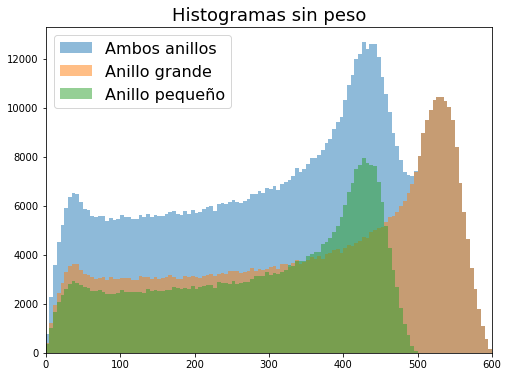

In [13]:
plt.figure(figsize = (8, 6))
plt.hist(dist_conj, bins = bins, alpha = 0.5, label = "Ambos anillos");
plt.hist(dist_gde, bins = bins, alpha = 0.5, label = "Anillo grande");
plt.hist(dist_peq, bins = bins, alpha = 0.5, label = "Anillo pequeño");
plt.xlim([0.0, 2.0 * r_e])
plt.title('Histogramas sin peso', fontsize = 18);
plt.legend(fontsize = 16);

El pico del histograma del anillo grande coincide casi exactamente con uno de los picos del histograma de los dos anillos juntos y lo tapa.

In [14]:
peso_gde = 0.5
peso_peq = 2.0

In [15]:
frec_con_peso = peso_gde * frec_gde + peso_peq * frec_peq

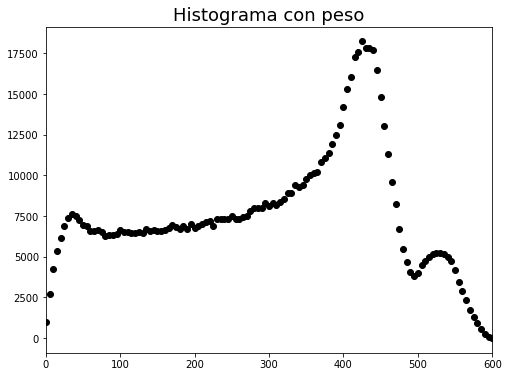

In [16]:
plt.figure(figsize = (8, 6))
plt.plot(bins, frec_con_peso, 'ko')
plt.xlim([0.0, 2.0 * r_e])
plt.title('Histograma con peso', fontsize = 18);

Se observa que el pico del lado derecho (el debido al anillo grande) se encogió.

In [17]:
nD = n_g + n_ch
nR = 2 * nD

In [18]:
x_rand, y_rand = distros.create_rand_dist(box_size, nR)

In [19]:
dist_rand, hist_rand = distros.save_hist(x_rand, y_rand, box_size, bin_size)
RR = hist_rand[0]

Añadiré peso al histograma DR también. A ver si es correcto...

In [20]:
dist_DR_gde_sinpeso, hist_DR_gde_sinpeso = distros.save_hist_DR(x_gde, y_gde, box_size, x_rand, y_rand, box_size, bin_size)
DR_gde_sinpeso = hist_DR_gde_sinpeso[0]

In [21]:
dist_DR_peq_sinpeso, hist_DR_peq_sinpeso = distros.save_hist_DR(x_peq, y_peq, box_size, x_rand, y_rand, box_size, bin_size)
DR_peq_sinpeso = hist_DR_peq_sinpeso[0]

In [22]:
DR_sinpeso = DR_gde_sinpeso + DR_peq_sinpeso

In [23]:
DR_conpeso = peso_gde * DR_gde_sinpeso + peso_peq * DR_peq_sinpeso

In [24]:
inv_nest = math.sqrt(nR * (nR - 1.0) / (nD * (nD - 1.0)))

In [25]:
f_corr_sinpeso = distros.landy_szalay(frec_conj, RR, DR_sinpeso, inv_nest)

/home/quaque/Escritorio/cosmostats2018-Pagutri/2daParte/Ejercicio5/distros.py:253: RuntimeWarning: invalid value encountered in true_divide
  return inv_nest**2 * DD / RR + 1.0 - 2.0 * inv_nest * DR / RR


In [26]:
f_corr_conpeso = distros.landy_szalay(frec_con_peso, RR, DR_conpeso, inv_nest)

/home/quaque/Escritorio/cosmostats2018-Pagutri/2daParte/Ejercicio5/distros.py:253: RuntimeWarning: invalid value encountered in true_divide
  return inv_nest**2 * DD / RR + 1.0 - 2.0 * inv_nest * DR / RR


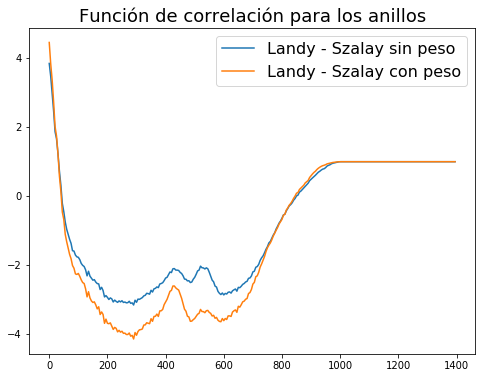

In [27]:
plt.figure(figsize = (8,6))
plt.plot(bins, f_corr_sinpeso, label = "Landy - Szalay sin peso")
plt.plot(bins, f_corr_conpeso, label = "Landy - Szalay con peso")
plt.legend(fontsize = 16)
plt.title('Función de correlación para los anillos', fontsize = 18);

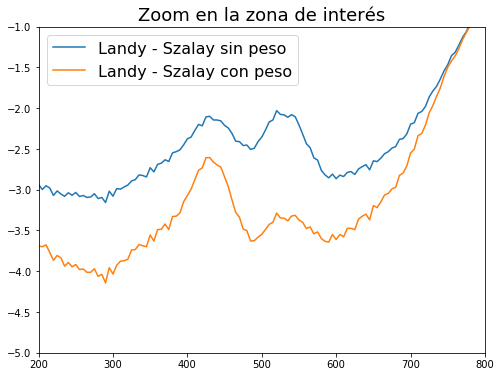

In [28]:
plt.figure(figsize = (8,6))
plt.plot(bins, f_corr_sinpeso, label = "Landy - Szalay sin peso")
plt.plot(bins, f_corr_conpeso, label = "Landy - Szalay con peso")
plt.xlim([200.0, 800.0])
plt.ylim([-5.0, -1.0])
plt.legend(fontsize = 16)
plt.title('Zoom en la zona de interés', fontsize = 18);

En ambas versiones de la función de correlación se observan dos picos. Uno entre $500$ y $600$, correspondiente al anillo grande, y otro entre $400$ y $500$, correspondiente al anillo pequeño. En la versión sin peso, la diferencia de altura entre ambos picos es pequeña, pero es mayor el del anillo grande, posiblemente porque tiene más puntos. En cambio, en la versión con peso, la diferencia es mucho más marcada y el pico mayor corresponde al anillo pequeño. El resultado es el esperado, dados los pesos que se asignaron a cada anillo.

__2.  De partículas a una malla.__ Usa la rutina [scipy.interpolate.griddata](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html). Sugerencia revisa el ejemplo de las notas de clase y el de la página anterior.

   __a)__ Crea una malla de 100x100, e interpola los datos del anillo y de los multiples anillos a esta malla. Grafíca los datos de la malla como gráfica de densidad y pon los puntos originales encimados. Llamaremos a esta malla y sus valores, el campo. Utiliza los tres métodos de interpolación: más cercano, lineal y cúbico 1D.

In [29]:
from scipy.interpolate import griddata

In [30]:
# Aquí pongo los pesos en los puntos,
# no en las distancias como he hecho hasta ahora
z_gde = peso_gde * np.ones(n_g)
z_peq = peso_peq * np.ones(n_ch)

In [31]:
x = np.concatenate((x_gde, x_peq))
y = np.concatenate((y_gde, y_peq))
z = np.concatenate((z_gde, z_peq))

In [35]:
x = np.random.random(100)
y = np.random.random(100)
z = np.random.random(100)

In [36]:
xi = yi = np.arange(0,1.01,0.01)
xi, yi = np.meshgrid(xi, yi)

In [37]:
zi_linear = griddata((x, y), z (xi, yi), method = 'linear')

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(xi,yi,zi,np.arange(0,1.01,0.01
))
plt.plot(x,y,'k.')
plt.xlabel('xi',fontsize=16)
plt.ylabel('yi',fontsize=16)
plt.savefig('interpolated.png',dpi=100)
plt.close(fig)

   b) Calcula la función de correlación (estimador de Landy-Salay) para ambas muestras de datos usando los putos de la malla, y asignando un peso en cada punto dado por el valor del campo en ese punto. Grafica la función de correlación obtenida por este método de malla y compárala en la misma gráfica con la obtenida en base a los puntos originales. ¿Se parecen? ¿Dónde cambia? ¿Cómo cambia con los diferentes métodos de interpolación?
    
   c) Calcula la transformada de Fourier de este campo discreto (ie de la malla) para ambas muestras de datos, y obtén los espectros de potencia como el valor de expectación del producto de dos campos en este espacio de Fourier. Gráfica tanto el campo en el espacio de Fourier, como el espectro de potencias. ¿Cómo cambian los resultados del espectro de potencias con los diferentes métodos de interpolación?
    
   d) Utiliza la transformada de Fourier inversa para encontrar la función de correlación a partir de los espectros de potencia anteriores, y compáralos con los que encontraste en el inciso b).